# Hamilton Celerino da Fonseca Neto
Atividade 1


#Import

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
sns.set_style('whitegrid')

print("✅ Bibliotecas carregadas com sucesso.")

✅ Bibliotecas carregadas com sucesso.


In [116]:
import kagglehub

path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.
Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


In [117]:
print(f"Files in the dataset directory: {os.listdir(path)}")

file_path = os.path.join(path, 'Salary_dataset.csv')
df = pd.read_csv(file_path)

print("Primeiras 5 linhas do DataFrame:")
display(df.head())

print("\nInformações e Integridade do DataFrame:")
df.info()

Files in the dataset directory: ['Salary_dataset.csv']
Primeiras 5 linhas do DataFrame:


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0



Informações e Integridade do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


#EDA

Contagem de valores nulos:
Series([], dtype: int64)

✅ O dataset está totalmente limpo. O heatmap é uma cor uniforme.


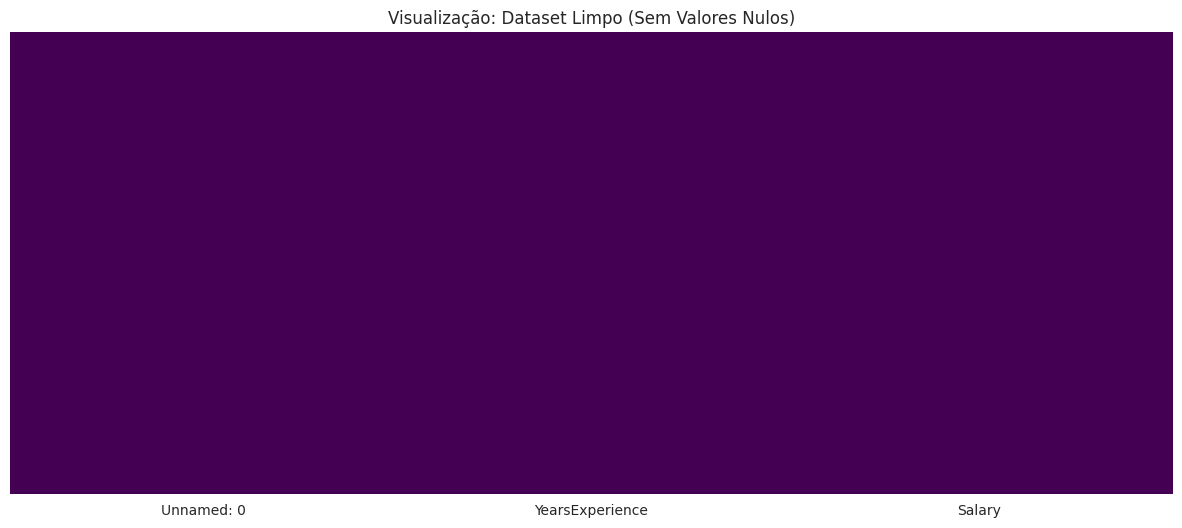

In [118]:
# Célula para Visualização da Ausência de Nulos (Heatmap)

# Verificando valores nulos no df existente
null_counts = df.isnull().sum()
null_counts_filtered = null_counts[null_counts > 0]
print("Contagem de valores nulos:")
print(null_counts_filtered)

# Visualização dos nulos (Gráfico deve ser uniforme)
if not null_counts_filtered.empty:
    print("\nVALORES NULOS ENCONTRADOS. Plotando Heatmap.")
    plt.figure(figsize=(15, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title("Visualização dos Valores Nulos no Dataset")
    plt.show()
else:
    print("\n✅ O dataset está totalmente limpo. O heatmap é uma cor uniforme.")
    # Plotando o heatmap uniforme para confirmar o estado limpo
    plt.figure(figsize=(15, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title("Visualização: Dataset Limpo (Sem Valores Nulos)")
    plt.show()

In [119]:
# Exibir estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


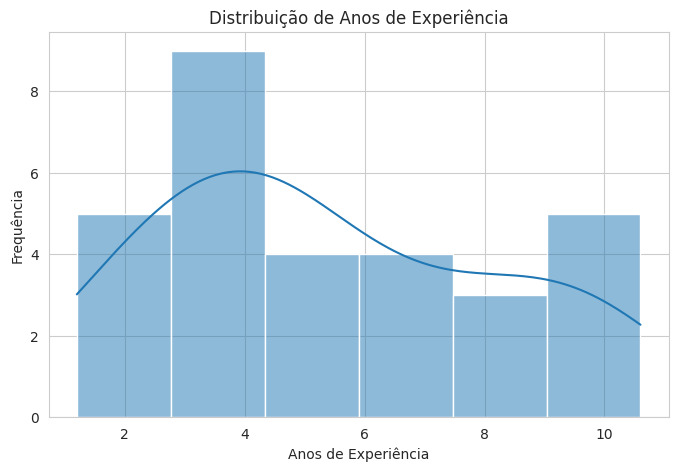

In [120]:
# Visualizar a distribuição da variável 'YearsExperience'
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsExperience'], kde=True)
plt.title('Distribuição de Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Frequência')
plt.show()

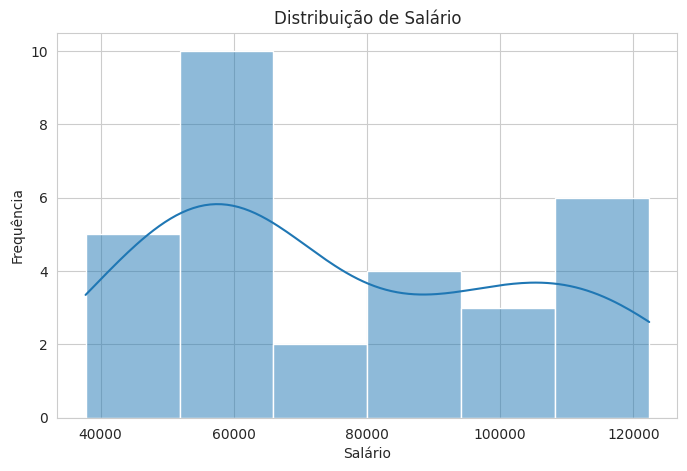

In [121]:
# Visualizar a distribuição da variável 'Salary'
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribuição de Salário')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

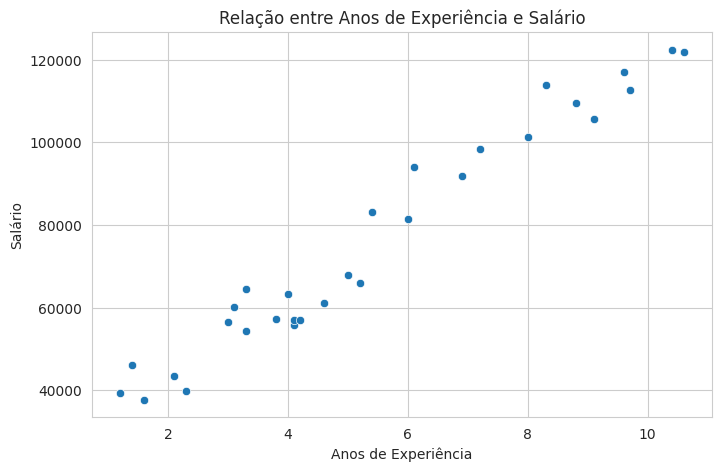

In [122]:
# Visualizar a relação entre 'YearsExperience' e 'Salary'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relação entre Anos de Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

# Pré-processamento e Feature Engineering

In [123]:
# Definição de Variáveis (X e y)
X = df[['YearsExperience']]
y = df['Salary']
print(f"Variável Preditora X (YearsExperience) shape: {X.shape}")
print(f"Variável Alvo y (Salary) shape: {y.shape}")

Variável Preditora X (YearsExperience) shape: (30, 1)
Variável Alvo y (Salary) shape: (30,)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Tamanho do conjunto de Treino: {X_train.shape[0]} observações")
print(f"Tamanho do conjunto de Teste: {X_test.shape[0]} observações")

print("\n✅ Divisão 80/20 concluída.")

Tamanho do conjunto de Treino: 24 observações
Tamanho do conjunto de Teste: 6 observações

✅ Divisão 80/20 concluída.


In [125]:
# Instanciar o modelo
regressor = LinearRegression()

# Treinar o modelo (Fit)
regressor.fit(X_train, y_train)

print("Modelo de Regressão Linear treinado com sucesso!")

Modelo de Regressão Linear treinado com sucesso!


# Predição


In [126]:
# Geração de Previsões

y_pred = regressor.predict(X_test)

print("✅ Previsões geradas com sucesso no conjunto de teste.")

✅ Previsões geradas com sucesso no conjunto de teste.


# Avaliar modelo

In [127]:
# Avaliação do Modelo (Métricas)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("--- Métricas de Desempenho no Conjunto de Teste ---")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")

--- Métricas de Desempenho no Conjunto de Teste ---
MAE (Erro Absoluto Médio): 6286.45
MSE (Erro Quadrático Médio): 49830096.86
RMSE (Raiz do Erro Quadrático Médio): 7059.04
R² (Coeficiente de Determinação): 0.9024


# Visualização

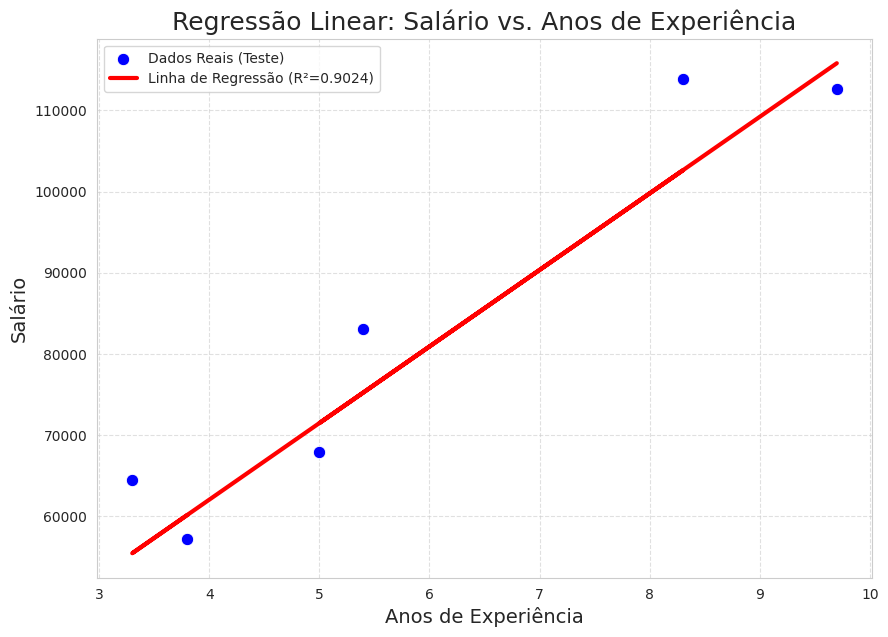

✅ Visualização final da Regressão Linear concluída.


In [128]:

plt.figure(figsize=(10, 7))

# Pontos de dados (Teste)
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='blue', label='Dados Reais (Teste)', s=80)

# Linha de Regressão Linear
plt.plot(X_test, y_pred, color='red', linewidth=3, label=f'Linha de Regressão (R²={r2:.4f})')

# Configurações do Gráfico
plt.title('Regressão Linear: Salário vs. Anos de Experiência', fontsize=18)
plt.xlabel('Anos de Experiência', fontsize=14)
plt.ylabel('Salário', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("✅ Visualização final da Regressão Linear concluída.")

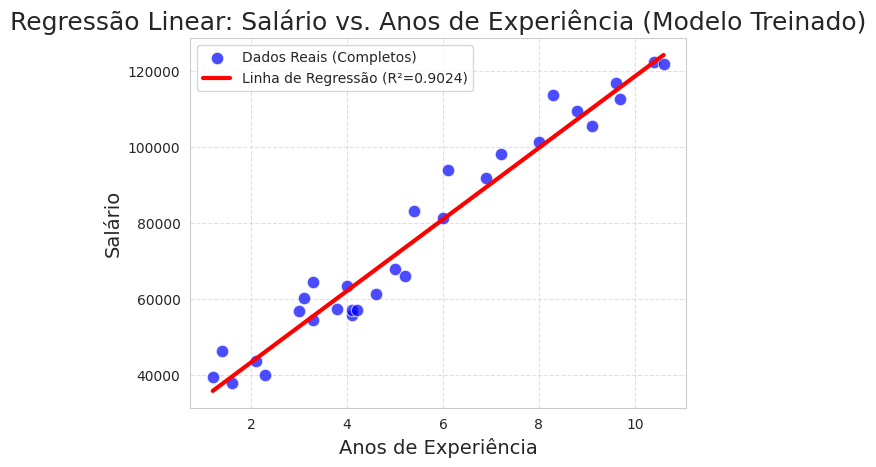

✅ Visualização final melhorada, mostrando a linha de regressão em todos os dados.


In [129]:
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'], color='blue', label='Dados Reais (Completos)', s=80, alpha=0.7)

y_all_pred = regressor.predict(df[['YearsExperience']])
plt.plot(df['YearsExperience'], y_all_pred, color='red', linewidth=3, label=f'Linha de Regressão (R²={r2:.4f})')

plt.title('Regressão Linear: Salário vs. Anos de Experiência (Modelo Treinado)', fontsize=18)
plt.xlabel('Anos de Experiência', fontsize=14)
plt.ylabel('Salário', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("✅ Visualização final melhorada, mostrando a linha de regressão em todos os dados.")

In [136]:
# Novos dados para predição
NovoTeste = pd.DataFrame([[16], [8], [4], [2]], columns=['YearsExperience'])

# Escalonamento dos Novos Dados
NovoTeste_scaled_array = scaler.transform(NovoTeste)

# Conversão para DataFrame com nomes das features
NovoTeste_scaled_df = pd.DataFrame(NovoTeste_scaled_array, columns=['YearsExperience'])

# Previsão do Salário
y_novo = regressor.predict(NovoTeste_scaled_df)

# Consolidação dos Resultados
novo = pd.DataFrame(y_novo, columns=['SalarioPrevisto'])
novo = pd.concat([NovoTeste.reset_index(drop=True), novo], axis=1)

print("✅ Previsão de Salário para novos dados:")
display(novo)

✅ Previsão de Salário para novos dados:


,YearsExperience,SalarioPrevisto
0,16,59419.059422
1,8,33252.351040
2,4,20168.996849
3,2,13627.319754
